In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

ModuleNotFoundError: No module named 'cv2'

In [2]:
DATADIR = "Dataset/"

CATEGORIES = ["DorsiFlexion of Foot","NECK Exercise","PlanterFlexion of Foot","Trunk Extension","Trunk Flexion","Wrist Extension","Wrist Flexion"]


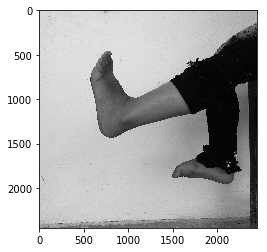

In [3]:
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  # 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray') 
        plt.show()  

        break  
    break  

In [4]:
print(img_array)


[[190 186 186 ... 149 153 158]
 [187 187 190 ... 154 155 158]
 [190 189 191 ... 158 156 158]
 ...
 [102 112 109 ...   8  19  21]
 [ 91  96  95 ...   1  13  20]
 [ 94  99  96 ...   0   8  18]]


In [5]:
print(img_array.shape)


(2448, 2448)


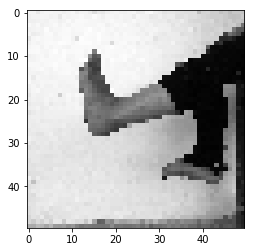

In [6]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

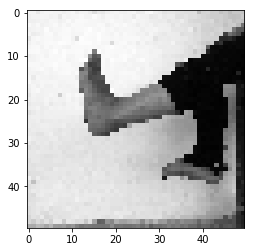

In [7]:

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [8]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                training_data.append([new_array, class_num])  
            except Exception as e:  
                pass
            

create_training_data()

print(len(training_data))

100%|████████████████████████████████████████| 164/164 [00:08<00:00, 19.66it/s]


1401


In [9]:
import random

random.shuffle(training_data)

In [10]:

for sample in training_data[:10]:
    print(sample[1])

2
4
2
4
2
0
1
6
2
5


In [11]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


[[[[ 56]
   [ 53]
   [ 55]
   ...
   [ 72]
   [ 77]
   [ 77]]

  [[ 53]
   [ 50]
   [ 47]
   ...
   [ 70]
   [ 72]
   [ 73]]

  [[ 51]
   [ 49]
   [ 48]
   ...
   [ 73]
   [ 77]
   [ 75]]

  ...

  [[ 57]
   [ 56]
   [ 58]
   ...
   [237]
   [148]
   [155]]

  [[ 57]
   [ 58]
   [ 58]
   ...
   [237]
   [131]
   [151]]

  [[ 58]
   [ 58]
   [ 57]
   ...
   [235]
   [187]
   [140]]]]


In [12]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [13]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [14]:
import sys
import gc
import time
import os
import logging
from multiprocessing import Pool, current_process
from multiprocessing import log_to_stderr, get_logger
from tqdm import tqdm
from numba import jit


import pandas as pd
import numpy as np

import keras
import keras.backend as K
from keras.layers import LSTM,Dropout,Dense,TimeDistributed,Conv1D,MaxPooling1D,Flatten
from keras.models import Sequential
import tensorflow as tf

from IPython.display import display, clear_output

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style("whitegrid")

C:\Users\Masroor shah\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [15]:
n_outputs = 9 #Binary Classification

In [16]:
import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=256, kernel_size=3, activation='relu'), input_shape=X.shape[1:]))
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=4)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50))
model.add(Dropout(0.5))
model.add(Dense(25, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

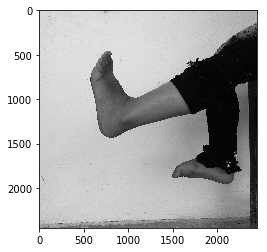

100%|████████████████████████████████████████| 164/164 [00:08<00:00, 25.06it/s]


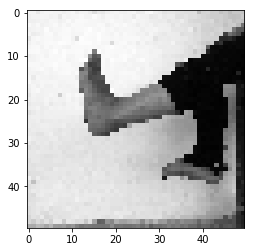

In [3]:
DATADIR = "Dataset/"

CATEGORIES = ["DorsiFlexion of Foot","DorsiFlexion of Foot","NECK Exercise","PlanterFlexion of Foot","Trunk Extension","Trunk Flexion","Wrist Extension","Wrist Flexion"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  # 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray') 
        plt.show()  

        break  
    break  

IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')

training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                training_data.append([new_array, class_num])  
            except Exception as e:  
                pass
            
#
create_training_data()



In [4]:
import random

random.shuffle(training_data)

for sample in training_data[:10]:
     print(sample[1])

0
6
0
7
0
2
6
0
7
4


In [5]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 95]
   [ 97]
   [ 98]
   ...
   [ 64]
   [ 65]
   [ 68]]

  [[ 98]
   [ 98]
   [ 99]
   ...
   [ 66]
   [ 68]
   [ 67]]

  [[101]
   [ 99]
   [ 96]
   ...
   [ 68]
   [ 68]
   [ 66]]

  ...

  [[177]
   [183]
   [184]
   ...
   [ 70]
   [ 68]
   [ 70]]

  [[177]
   [192]
   [215]
   ...
   [ 70]
   [ 69]
   [ 68]]

  [[191]
   [188]
   [200]
   ...
   [ 71]
   [ 71]
   [ 73]]]]


In [6]:
#
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

GRU = Sequential()

GRU.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
GRU.add(Activation('relu'))
GRU.add(MaxPooling2D(pool_size=(2, 2)))

GRU.add(Conv2D(256, (3, 3)))
GRU.add(Activation('relu'))
GRU.add(MaxPooling2D(pool_size=(2, 2)))

GRU.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

GRU.add(Dense(64))


GRU.add(Dense(9))
GRU.add(Activation('softmax'))

GRU.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

GRU.fit(X, y, batch_size=32, epochs=12, validation_split=0.3)

C:\Users\Masroor shah\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 1126 samples, validate on 483 samples
Epoch 1/12
1126/1126 [==============================] - ETA: 1:16 - loss: 2.2167 - acc: 0.0000e+0 - ETA: 54s - loss: 2.7982 - acc: 0.1719    - ETA: 46s - loss: 2.5657 - acc: 0.18 - ETA: 41s - loss: 2.4495 - acc: 0.21 - ETA: 38s - loss: 2.3925 - acc: 0.18 - ETA: 35s - loss: 2.3492 - acc: 0.20 - ETA: 33s - loss: 2.3070 - acc: 0.22 - ETA: 32s - loss: 2.2792 - acc: 0.21 - ETA: 30s - loss: 2.2402 - acc: 0.22 - ETA: 29s - loss: 2.2036 - acc: 0.22 - ETA: 27s - loss: 2.1825 - acc: 0.23 - ETA: 26s - loss: 2.1650 - acc: 0.23 - ETA: 24s - loss: 2.1572 - acc: 0.23 - ETA: 23s - loss: 2.1433 - acc: 0.23 - ETA: 22s - loss: 2.1251 - acc: 0.23 - ETA: 21s - loss: 2.1173 - acc: 0.24 - ETA: 20s - loss: 2.1047 - acc: 0.24 - ETA: 18s - loss: 2.0996 - acc: 0.23 - ETA: 17s - loss: 2.0934 - acc: 0.22 - ETA: 16s - loss: 2.0847 - acc: 0.22 - ETA: 15s

1126/1126 [==============================] - ETA: 35s - loss: 0.1595 - acc: 1.00 - ETA: 34s - loss: 0.1806 - acc: 0.96 - ETA: 49s - loss: 0.1655 - acc: 0.96 - ETA: 45s - loss: 0.1578 - acc: 0.96 - ETA: 41s - loss: 0.1504 - acc: 0.97 - ETA: 45s - loss: 0.1523 - acc: 0.96 - ETA: 42s - loss: 0.1500 - acc: 0.96 - ETA: 39s - loss: 0.1444 - acc: 0.96 - ETA: 36s - loss: 0.1389 - acc: 0.96 - ETA: 38s - loss: 0.1344 - acc: 0.97 - ETA: 35s - loss: 0.1272 - acc: 0.97 - ETA: 33s - loss: 0.1272 - acc: 0.97 - ETA: 33s - loss: 0.1281 - acc: 0.97 - ETA: 31s - loss: 0.1361 - acc: 0.96 - ETA: 29s - loss: 0.1333 - acc: 0.97 - ETA: 27s - loss: 0.1332 - acc: 0.97 - ETA: 27s - loss: 0.1353 - acc: 0.96 - ETA: 25s - loss: 0.1324 - acc: 0.96 - ETA: 23s - loss: 0.1330 - acc: 0.96 - ETA: 22s - loss: 0.1309 - acc: 0.96 - ETA: 21s - loss: 0.1312 - acc: 0.96 - ETA: 19s - loss: 0.1279 - acc: 0.96 - ETA: 17s - loss: 0.1269 - acc: 0.96 - ETA: 16s - loss: 0.1282 - acc: 0.97 - ETA: 15s - loss: 0.1267 - acc: 0.97 - ETA: 

In [8]:
predictions = GRU.predict_classes(X)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

array([0, 6, 0, 7, 0, 2, 6, 0, 7, 4, 2, 2, 7, 0, 2], dtype=int64)

In [9]:
from sklearn.metrics import classification_report

In [25]:
from sklearn.metrics import accuracy_score

In [27]:
from sklearn.metrics import confusion_matrix